# EJERCICIO 1


## Apartado 1.1

El  problema  del  alquiler  de  la  vivienda  ya  forma  parte  del  contexto  de  la  mayoría  de  grandes  ciudades  del 
mundo. Hay varios factores que se enumeran como parte del problema: el turismo masivo, la distribución de 
las ciudades o el auge de los apartamentos turísticos como es el caso de Airbnb. Lo que si queda claro es que 
los datos obtenidos del portal sirven para obtener una radiografía más o menos valida de la ciudad. A través 
del dataset  proporcionado en Moodle en el que  se miden las estancias en los últimos años en la ciudad de 
New York. Hay varias preguntas que nos hacemos.

El barrio de Williamsburg es uno de los barrios de moda hoy en día. Desde 2005 ha pasado de ser 
un distrito donde principalmente se encontraban fabricas a acoger una gran cantidad de gente joven y nuevos 
negocios. ¿Teniendo en cuenta los datos proporcionados que posición en términos de popularidad/calidad se 
puede decir que ostenta el barrio con respecto a los demás que forma New York? 

Los objetivos para este apartado es ver donde se clasifica el barrio de Williamsburg en términos de popularidad frente a los otros barrios que nos han proporcionado. Vamos a necesitar clasificar de modo que encontremos la popularidad y calidad de un apartamento. 

Empezamos con la selección de los datos. 

Procesamos a cargar y a visualizar nuestra base de datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
data = pd.read_csv('airbnb.csv', encoding = 'latin_1')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Empezamos a preprocesar los datos, limpiamos y los preparamos para conseguir nuestro objetivo. 

¿Tenemos datos incompletos o datos renundantes en nuestro set de datos?

In [3]:
data.isnull().values.any()

True

In [4]:
data.isnull().sum().sum()

20141

Esta función nos ayuda a saber cuántos datos nulos obtenemos. En el primer caso tenemos 20.141 atributos que son nulos. 

Ahora debemos de pensar que hacer con ellos, ¿Los eliminamos? o ¿Los completamos?


In [82]:
data.columns[data.isnull().any()]

Int64Index([], dtype='int64')

  Con esta función vemos que columnas tienen valores nulos.
  Las columnas que son nulas son la de el nombre y el nombre del propietario del Airbnb, estas columnas no las vamos a tocar.
  
  Las últimas reseñas y las reseñas por mes también tienen atributos nulos, a estos valores los vamos a volver 0. Si observamos nuestro data frame, los valores que tienen nulos las últimas reseñas también los tienen para las reseñas del último mes. Las vamos a volver 0 porque si hacemos la media de estos, vamos a atribuirle un valor que no es cierto. 

In [6]:
data['last_review'].fillna(0, inplace=True)
data['reviews_per_month'].fillna(0, inplace=True)
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2


Observamos que los datos se han reemplazado adecuadamente.

Para medir  la popularidad/calidad del barrio, tendremos primero  en cuenta el número de apartamentos  de 
calidad según los usuarios. Para ello, lo primero será clasificar los apartamentos como “Muy Malos”, “Malos”, 
“Regulares”, “Buenos” y “Muy Buenos”. 

Suponemos que  las reseñas por mes, se dividirán en 3 rangos iguales, después dependiendo del valor concreto que 
tenga cada apartamento se le asignarán las etiquetas: “Baja”, “Media” y ”Alta”. 

In [7]:
data["reviews_per_month"]

0        0.21
1        0.38
2        0.00
3        4.64
4        0.10
         ... 
48890    0.00
48891    0.00
48892    0.00
48893    0.00
48894    0.00
Name: reviews_per_month, Length: 48895, dtype: float64

In [8]:
max = data['reviews_per_month'].max()
min = data['reviews_per_month'].min()
max


58.5

Pero antes de hacer la partición de los datos , debemos de estudiar los outliers que tenemos en nuestra variable. 
Si pasamos de largo los outliers podemos atribuir una categoria a una reseña que no es válida. 
Con el diagrama de cajas podemos ver como se distribuyen nuestros datos. 

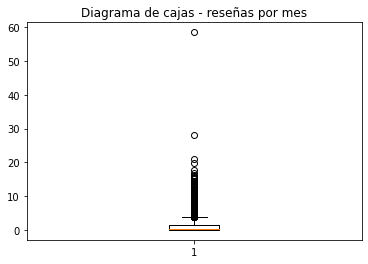

In [9]:
boxplot_resenas = data['reviews_per_month']
plt.boxplot(boxplot_resenas)
plt.title('Diagrama de cajas - reseñas por mes')
plt.show()

Con el diagrama ya podemos observar que tebemos algún dato anómalo. 

In [10]:
from matplotlib.cbook import boxplot_stats
stats = boxplot_stats(boxplot_resenas)
stats = stats[0]
outliers = stats['fliers']
min = stats['q1']-1.5*stats['iqr']
max = stats['q3']+1.5*stats['iqr']
print(max,min,len(outliers))

3.89 -2.27 3312


Aqui podemos ver que tenemos datos que se nos van de rangos. La partición se debe de hacer a partir de este gráfico. Se ha decidido partir los datos con los siguientes rango: [0,1.3], [1.3,2.6] y [2.6,58.5]

In [11]:
corte1 = 1.3
corte2 = 2.6
data['Etiqueta_res'] = "Baja"
data.loc[(data['reviews_per_month'] > corte1) & (data['reviews_per_month'] <= corte2), 'Etiqueta_res'] = "Media"
data.loc[data['reviews_per_month'] > corte2, 'Etiqueta_res'] = "Alta"

In [12]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Etiqueta_res
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Baja
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Baja
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,Baja
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Alta
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9,Baja
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36,Baja
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27,Baja
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2,Baja


Se ha creado la clasificación y se ha añadido a la nueva columna del Dataframe. 

Ahora queremos dividir una nueva variable, la de números de días disponibles. La queremos dividir en: poco, normal y altamente disponible.
Para ellos vamos a volver hacer lo que hemos hecho con la anterior. 

Para esta variable también vamos a visualizar los outliers.

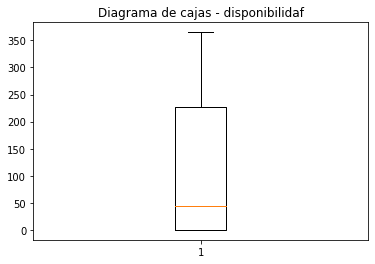

In [13]:
boxplot_availability = data['availability_365']
plt.boxplot(boxplot_availability)
plt.title('Diagrama de cajas - disponibilidaf')
plt.show()

Observamos que no tenemos datos anómalos. Entonces la partición la vamos a realizar de maneras iguales.

In [14]:
maxi = data['availability_365'].max()
mini = data['availability_365'].min()

In [15]:
mini

0

In [16]:
maxi

365

El mínimo es de 0 días disponible y el máximo es de los 365 días disponible.

In [17]:
cor1 = mini + (maxi - mini) / 3 
cor2 = maxi + 2 * (maxi - mini) / 3
data['Etiquetas_disp'] = "Poco"
data.loc[(data['availability_365'] > corte1) & (data['availability_365'] <= corte2), 'Etiquetas_disp'] = "Normal"
data.loc[data['availability_365'] > corte2, 'Etiquetas_disp'] = "Altamente"

In [18]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Etiqueta_res,Etiquetas_disp
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Baja,Altamente
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Baja,Altamente
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,Baja,Altamente
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Alta,Altamente
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Baja,Poco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9,Baja,Altamente
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36,Baja,Altamente
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27,Baja,Altamente
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2,Baja,Normal


Una vez dividido las dos columnas que necesitábamos crearemos una nueva columna donde clasificaremos los apartamentos de la siguiente manera:


*   Si Reseñas es Baja y Disponibilidad es “Poco disponible” -> “Bueno” 
*   Si Reseñas es Media y Disponibilidad es “Poco disponible” -> “Bueno” 
*   Si Reseñas es Alta y Disponibilidad es “Poco disponible” -> “Muy Bueno” 
*   Si Reseñas es Baja y Disponibilidad es “Disponible normalmente” -> “Regular”
*   Si Reseñas es Media y Disponibilidad es “Disponible normalmente” -> “Regular” 
*   Si Reseñas es Alta y Disponibilidad es “Disponible normalmente” -> “Bueno” 
*   Si Reseñas es Baja y Disponibilidad es “Altamente disponible” -> “Malo”
*   Si Reseñas es Media y Disponibilidad es “Altamente disponible” -> “Malo”
*  Si Reseñas es alta y Disponibilidad es “Altamente disponible” -> “Muy malo” 
 

Para ello se ha decidido crear una función llamada clasificación.

In [19]:
def clasificación(Etiqueta_res, Etiquetas_disp):
    if Etiqueta_res == "Baja" and Etiquetas_disp == "Poco":
        return "Bueno"
    elif Etiqueta_res == "Media" and Etiquetas_disp == "Poco":
        return "Bueno"
    elif Etiqueta_res == "Alta" and Etiquetas_disp == "Poco":
        return "Muy Bueno"
    elif Etiqueta_res == "Baja" and Etiquetas_disp == "Normal":
        return "Regular"
    elif Etiqueta_res == "Media" and Etiquetas_disp == "Normal":
        return "Regular"
    elif Etiqueta_res == "Alta" and Etiquetas_disp == "Normal":
        return "Bueno"
    elif Etiqueta_res == "Baja" and Etiquetas_disp == "Altamente":
        return "Malo"
    elif Etiqueta_res == "Media" and Etiquetas_disp == "Altamente":
        return "Malo"
    elif Etiqueta_res == "Alta" and Etiquetas_disp == "Altamente":
        return "Muy malo"

data["Clasificación"] = data.apply(lambda x: clasificación(x["Etiqueta_res"], x["Etiquetas_disp"]), axis=1)

In [20]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Etiqueta_res,Etiquetas_disp,Clasificación
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Baja,Altamente,Malo
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Baja,Altamente,Malo
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,Baja,Altamente,Malo
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Alta,Altamente,Muy malo
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Baja,Poco,Bueno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9,Baja,Altamente,Malo
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36,Baja,Altamente,Malo
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27,Baja,Altamente,Malo
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2,Baja,Normal,Regular


Las columnas que hemos creado para clasificar los apartamentos no nos interesan, entonces las borramos de nuestro dataframe.
También debemos ver que se han cargado bien, para ello vamos a ver si ha puesto algun valor nulo.


In [21]:
data.isnull().values.any()

True

In [22]:
data.columns[data.isnull().any()]

Index(['name', 'host_name'], dtype='object')

Como las columnas que tienen valores nulos son las que ya habíamos visto antes, se han cargado los datos. 

In [23]:
data.drop(columns=['Etiqueta_res', 'Etiquetas_disp'], inplace=True)

In [24]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Clasificación
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Malo
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Malo
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,Malo
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Muy malo
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Bueno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9,Malo
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36,Malo
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27,Malo
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2,Regular


Para poder entender mejor y clasificar donde queda el barrio que nos interesa se ha decidido pasar a númerico lo que hemos clasificado anteriormente. 

In [25]:
def categorizar(clase):
    if clase == 'Muy malo':
        return 1
    if clase == 'Malo':
        return 2
    if clase == 'Regular':
        return 3
    if clase == 'Bueno':
        return 4
    if clase == 'Muy bueno':
       return 5

data['Clasificacion2'] = data['Clasificación'].apply(categorizar)
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Clasificación,Clasificacion2
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Malo,2.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Malo,2.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,Malo,2.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Muy malo,1.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Bueno,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9,Malo,2.0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36,Malo,2.0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27,Malo,2.0
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2,Regular,3.0


Se ha pensado que para resolver a la pregunta que se espera: **¿Teniendo en cuenta los datos proporcionados que posición en términos de popularidad/calidad se puede decir que ostenta el barrio con respecto a los demás que forma New York?**, si se agrupan todos de los barrios que tiene nuestro dataset (con la nueva columna creada del dataframe), se realiza la media de todas ellas, podemos comparar donde se encuentra el barrio que queremos.

A partir de ahora los cambios necesarios se harán en el dataframe **datab**.

In [26]:
datab = data

Debemos de agrupar los barrios para poder compararlos. Con la función groupby podemos agrupar los atributos que queremos. 

In [27]:
datab = datab.groupby("neighbourhood").mean().reset_index()
datab = datab[['neighbourhood', 'Clasificacion2']]
datab

,neighbourhood,Clasificacion2
0,Allerton,2.071429
1,Arden Heights,2.500000
2,Arrochar,1.904762
3,Arverne,1.922078
4,Astoria,2.661074
...,...,...
216,Windsor Terrace,2.692308
217,Woodhaven,1.988636
218,Woodlawn,2.090909
219,Woodrow,4.000000


Podemos observar que tenemos 221 barrios diferentes en nuestro dataframe. Se ha decidido hacer la media de los barrios. Podemos realizar un gráfico para observarlos mejor. 

Para asegurarnos que la agrupación se ha hecho correctamente, pensamos que podemos ver si hay datos duplicados, es decir, que un barrio este dos veces. 

In [28]:
duplicados = datab["neighbourhood"].duplicated().any()
duplicados


False

No existen barrios duplicados.

In [127]:
datab = datab.sort_values("Clasificacion2")
datab.reset_index()

,index,neighbourhood,Clasificacion2
0,177,Silver Lake,1.000000
1,101,Huguenot,1.333333
2,62,East Morrisania,1.500000
3,199,Unionport,1.571429
4,140,New Brighton,1.600000
...,...,...,...
216,174,Sea Gate,3.142857
217,130,Morningside Heights,3.208211
218,141,New Dorp,4.000000
219,9,"Bay Terrace, Staten Island",4.000000


Aquí ya tenemos ordenados los barrios conforme la clasificación que queríamos anteriormente. Pero, ¿Dónde se encuentra el barrio de Williamsburg en esta tabla?

In [128]:
barrio = datab.loc[datab['neighbourhood'] == 'Williamsburg']
barrio

,neighbourhood,Clasificacion2
214,Williamsburg,2.866581


Podemos observar la media del barrio de Williamsburg. 

In [31]:
media = datab['Clasificacion2'].mean()
media

2.2829174400777714

Podemos observar que la media de total de los 221 barrios que tenemos en nuestro dataframe es de 2.28, por tanto, nuestro barrio, supera esta media, de hecho nuestro barrio tiene una mediad de 2.87. 

Veámoslo con un gráfico.

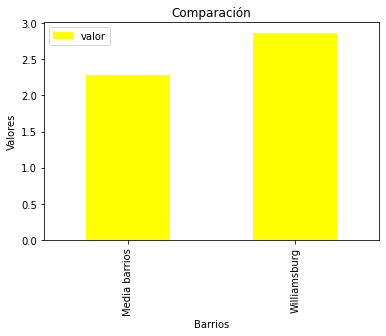

In [32]:
data = {'barrio': ['Media barrios', 'Williamsburg'], 'valor': [media, 2.866581]}
df_grafico = pd.DataFrame(data)

df_grafico.plot.bar(x='barrio', y='valor', color='yellow')


plt.xlabel('Barrios')
plt.ylabel('Valores')
plt.title('Comparación')

plt.show()

### Conclusión

## Apartado 1.2

Explica visualmente como se distribuyen los 5 barrios más populares (esto serán aquellos cuyos 
apartamentos estén más solicitados en números absolutos). 

Para decidir cuál de los barrios es el más popular, se ha pensado que: el set de datos que nos han proporcionado mide las estancias de los últimos años de los airbnb en el estado de Nueva York, por tanto, podemos suponer que cuantas más veces salga un barrio en el dataset, es porque la gente lo ha alquilado, por tanto, cuantas más personas hayan ido, es porque es un barrio popular. 

Para ellos vamos a volver a cargar los datos y a eliminar los datos nulos, esto lo hacemos por precaución, no tiene porque ser así. 

In [33]:
import pandas as pd
data = pd.read_csv('airbnb.csv', encoding = 'latin_1')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [34]:
data['last_review'].fillna(0, inplace=True)
data['reviews_per_month'].fillna(0, inplace=True)
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2


Todos estos son los barrios que tenemos en nuestro dataframe.

In [35]:
atributos = data['neighbourhood'].unique()
atributos

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

La frecuencia de los barrios podemos visualizarlos con la siguiente función:


In [36]:
barrios = data['neighbourhood'].value_counts()
print(barrios[:221])

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64


Vamos a generar una nueva columna, esta estará definida por las frecuencias 

In [37]:
barrios = data['neighbourhood'].value_counts()
data['Frecuencia_barrios'] = data['neighbourhood'].map(barrios)
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Frecuencia_barrios
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,175
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1545
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,2658
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,572
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9,3714
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36,2465
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27,2658
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2,1958


Ahora vamos agrupar los barrios.

In [38]:
data = data.groupby('neighbourhood').first().reset_index()
data

,neighbourhood,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Frecuencia_barrios
0,Allerton,182177,A PRIVATE FLAT / APARTMENT- $SPECIAL$,873273,Christian & Carla,Bronx,40.86466,-73.85709,Entire home/apt,125,2,271,2019-06-20,2.84,2,347,42
1,Arden Heights,22730139,Staten Island full size living space-lower level,167595532,Nabil,Staten Island,40.56033,-74.18259,Entire home/apt,75,1,20,2019-01-08,1.55,1,6,4
2,Arrochar,258838,"Oceanview,close to Manhattan",1360198,Marina,Staten Island,40.59251,-74.06479,Entire home/apt,250,2,21,2019-05-22,0.26,4,333,21
3,Arverne,581542,Escape to our Great Beach Getaway,2861854,Jeanmarie,Queens,40.59783,-73.80158,Entire home/apt,92,1,55,2017-06-01,0.66,1,8,77
4,Astoria,63360,Safe cute near subway& Manhattan NY NY retro s...,307962,Dennis & Naoko,Queens,40.75384,-73.91433,Entire home/apt,99,5,441,2019-06-24,4.50,1,226,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Windsor Terrace,8505,Sunny Bedroom Across Prospect Park,25326,Gregory,Brooklyn,40.65599,-73.97519,Private room,60,1,19,2019-06-23,1.37,2,85,157
217,Woodhaven,1767037,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,40.68968,-73.85219,Private room,29,2,386,2019-06-19,5.53,3,50,88
218,Woodlawn,149777,Artsy 1 bedroom Apt. 20 min to 42nd Grand Cent...,716306,"Dee, Dre & Mama Shelley",Bronx,40.89747,-73.86390,Entire home/apt,77,1,197,2019-06-23,2.49,1,309,11
219,Woodrow,1798271,Spacious center hall colonial,9430973,Donna,Staten Island,40.53884,-74.19826,Entire home/apt,700,7,0,0,0.00,1,0,1


Vamos a ordenar el Dataframe, así podemos visualizar mejor cuales son los barrios más populares, o mejor dicho, los más frecuentados

In [39]:
data = data.sort_values(by='Frecuencia_barrios', ascending=False)
data

,neighbourhood,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Frecuencia_barrios
214,Williamsburg,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46,3920
13,Bedford-Stuyvesant,5121,BlissArtsSpace!,7356,Garon,Brooklyn,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,3714
94,Harlem,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,2658
28,Bushwick,11708,Cute apt in artist's home,44145,Tyrome,Brooklyn,40.70186,-73.92745,Entire home/apt,85,2,231,2019-06-22,1.96,2,22,2465
202,Upper West Side,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,1971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Richmondtown,12966225,"1 bedroom apt, comforts of home, close to all..",71312760,Don,Staten Island,40.57093,-74.12429,Entire home/apt,78,3,79,2019-06-23,2.56,1,300,1
215,Willowbrook,27088022,"Bright, Brand NEW, and Spacious, Gorgeous Home",115827173,David,Staten Island,40.59886,-74.13217,Entire home/apt,249,4,9,2019-05-13,0.80,2,351,1
82,Fort Wadsworth,20305160,Beach House Retreat. 15 minutes from Manhattan.,1715301,Mark,Staten Island,40.59546,-74.06092,Entire home/apt,800,7,0,0,0.00,3,365,1
141,New Dorp,23597323,Staten Island Studio,99270668,Joseph,Staten Island,40.57044,-74.11747,Entire home/apt,57,1,0,0,0.00,1,0,1


Como queremos ver los 5 barrios más populares, y los hemos ordenado según su frecuencia, ya los tenemos ordenados. 

Vemos que los más popoulares son:

*   Williamsburg
*   Bedford-Stuyvesant
*   Harlem
*   Bushwick
*   Upper West Side



In [40]:
populares = pd.DataFrame({'neighbourhood': ['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick', 'Upper West Side'],
                   'Frecuencia_barrios': [3920, 3714, 2658, 2465, 1971]})

populares

,neighbourhood,Frecuencia_barrios
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971


Ahora vamos a realizar el diagrama de burbuja.

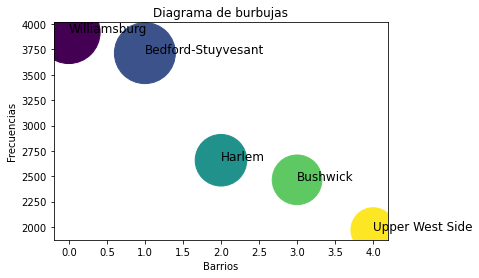

In [41]:
plt.scatter(populares.index, populares['Frecuencia_barrios'], s=populares['Frecuencia_barrios'], c=populares.index, cmap='viridis')

# Agregar etiquetas y títulos a los ejes
plt.xlabel('Barrios')
plt.ylabel('Frecuencias')
plt.title('Diagrama de burbujas')

for i, txt in enumerate(populares['neighbourhood']):
    plt.annotate(txt, (populares.index[i], populares['Frecuencia_barrios'][i]), fontsize=12)

# Mostrar el gráfico
plt.show()

Con el diagrama de burbujas de los 5 barrios más populares vemos que el barrio de Williamsburg y el de Bedford-Stuyvesant han sido los más frecuentados en los últimos años, a estos le siguen otros tres. Los dos que hemos nombrado anteriormente, son los que ganan en el ranking. 

## Apartado 1.3

Una  vez  obtenida  la  información  del  apartado  anterior,  queremos  tratar  de  entender  las 
diferencias  de  precio  entre  alquilar  un  apartamento  entero  y  una  habitación  privada.  

In [42]:
import pandas as pd
data = pd.read_csv('airbnb.csv', encoding = 'latin_1')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [43]:
data['last_review'].fillna(0, inplace=True)
data['reviews_per_month'].fillna(0, inplace=True)
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


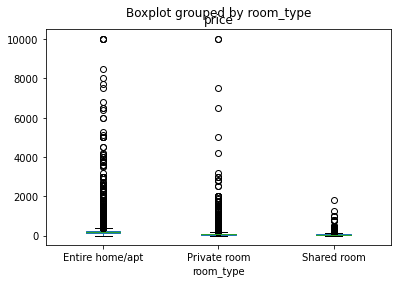

In [44]:
data.boxplot(by ='room_type', column =['price'], grid = False)

Para este apartado, nos piden realizar la comparación de los precios de las habitaciones privadas y de los apartamentos. En la columna 'room_type', nos explica el tipo de habitación que un cliente puede obtar al alquilar un servicio de airbnb. 

In [45]:
atrib = data['room_type'].unique()
atrib

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Vemos que hay 3 tipos diferentes de habitaciones: habitación compartida, apartamento entero y habitación privada. 

In [46]:
tipo = data['room_type'].value_counts()
tipo

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Esta función nos indica la frecuencia de los tipos de habitaciones. Vemos que se han alquilado más apartamentos enteros que el resto. 

Para poder realizar la comparación con el precio, lo que debemos hacer es: encontrar la media de los precios de los tres tipos de habitaciones para poder compararlos. 

In [47]:
data = data.groupby("room_type").sum().reset_index()
data = data[['room_type','price']]
data

,room_type,price
0,Entire home/apt,5381480
1,Private room,2004450
2,Shared room,81348


El precio es con números enteros. 
Ahora que hemos sumado el precio total de laos tres tipos de habitacion, realizamos la media (con sus frecuencias). La media la vamos a realizar a mano.

In [48]:
data.insert(2, "Media", [5381480/25409, 2004450/22326, 81348/1160], True)
data

,room_type,price,Media
0,Entire home/apt,5381480,211.794246
1,Private room,2004450,89.780973
2,Shared room,81348,70.127586


## Apartado 1.4

Por  último,  se  intuye  que  la  tendencia  a  dejar  reseñas  en  las  apps  que  prestan  servicios,  ha 
aumentado  en  los  últimos  años.  

Decide  que  diagrama  es  más  útil  para  este  caso.  Dibújalo  y  realiza  una 
interpretación del mismo. Tomaremos la fecha de la última reseña como el dato útil para realizar dicho caso.

In [115]:
import pandas as pd
data = pd.read_csv('airbnb.csv', encoding = 'latin_1')
data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [116]:
data['last_review'].fillna(0, inplace=True)
data['reviews_per_month'].fillna(0, inplace=True)
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2


Anteriormente se ha rellenado las columnas que tenian números nulos, para el caso de ver si las reseñas han aumentado en los últimos años los 0 que se han reemplazado no no interesan, para ello, hemos decidido borrar los datos del dataframe. Como las columnas que tenian datos nulos eran las mismas para las reseñas por mes y la fecha del último día de la reseña con eliminar una fila nos vale.

In [117]:
data = data.loc[data['last_review'] != 0]
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,HâAi,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


Nuestro Dataframe ha disminuido, entonces se han borrado correctamente.

In [118]:
data = data.groupby(['last_review']).agg(
                                  {'number_of_reviews': 'sum', 
                                  }).reset_index()
                                  
data

,last_review,number_of_reviews
0,2011-03-28,1
1,2011-04-25,14
2,2011-05-12,2
3,2011-09-18,9
4,2011-09-19,1
...,...,...
1759,2019-07-04,18332
1760,2019-07-05,32856
1761,2019-07-06,30740
1762,2019-07-07,36395


Aquí tenemos de manera ordenada (antes a ahora), el dia que se produjo la última reseña, y se ha sumado (a los días iguales) el número de reseñas que tenían. 

Para verlo de la forma más sencilla posible, se ha decidio utilizar un **diagrama en línea**.

In [119]:
data.columns

Index(['last_review', 'number_of_reviews'], dtype='object')

Text(0.5, 1.0, 'Diagrama de línea de dos columnas')

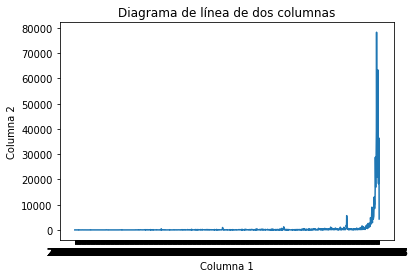

In [104]:
data = data[["last_review", "number_of_reviews"]]

# Crear el diagrama de línea
plt.plot(data["last_review"], data["number_of_reviews"])

# Añadir etiquetas y títulos a los ejes
plt.xlabel("Columna 1")
plt.ylabel("Columna 2")
plt.title("Diagrama de línea de dos columnas")


Obervamos que al tener tantos datos, no es posible realizar una buena visión de la gráfica, si agrupamos las fechas por año, posiblemente sea mucho más fácil visualizarlo. 

In [121]:
data["last_review"] = pd.to_datetime(data["last_review"])
data["Año"] = data["last_review"].dt.year
data = data.groupby("Año").agg({'number_of_reviews': 'sum', 
                                  }).reset_index()
data

,Año,number_of_reviews
0,2011,61
1,2012,178
2,2013,242
3,2014,932
4,2015,5762
5,2016,16182
6,2017,28534
7,2018,72359
8,2019,1013755


Text(0.5, 1.0, 'Evolución reseñas por año')

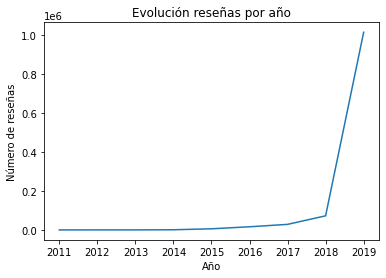

In [125]:
data = data[["Año", "number_of_reviews"]]
plt.plot(data["Año"], data["number_of_reviews"])
plt.xlabel("Año")
plt.ylabel("Número de reseñas")
plt.title("Evolución reseñas por año")


Este gráfico nos dice que durante los primeros años, más concretamente des de 2011 a 2017, las reseñas por mes eran bastante bajas, es decir, antes no se oscilaba tanto dejar reseñas, en cambio desde 2017 podemos ver que empiezan a dispararse las reseñas y, en 2018 empieza el boom. Estamos seguros, que ha día de hoy (2023), este gráfico, seguiría subiendo.